In [ ]:
!pip uninstall crypto
!pip uninstall pycryptodome
!pip install pycryptodome

Found existing installation: pycryptodome 3.19.0
Uninstalling pycryptodome-3.19.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/Crypto/*
    /usr/local/lib/python3.10/dist-packages/pycryptodome-3.19.0.dist-info/*
Proceed (Y/n)? 

In [ ]:
!pip install cryptography

In [ ]:
from hashlib import sha256
import base64
from Crypto import Random
from Crypto.Cipher import AES
import pandas as pd
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives import serialization
from cryptography.hazmat.primitives.serialization import load_pem_private_key
from cryptography.hazmat.primitives.serialization import load_pem_public_key
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives.asymmetric import padding
from cryptography.exceptions import InvalidSignature
from cryptography.hazmat.primitives import serialization, hashes

In [ ]:
!pip install stepic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.2/219.2 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stepic: filename=stepic-0.5.0-py3-none-any.whl size=12413 sha256=4fe7f61b1bd5e2edb2006adff8b122dc42f8f77bc38b3a0ded185936d5984245
  Stored in directory: /root/.cache/pip/wheels/0d/e7/18/500b3012b875d302152506f79d026ea3e66c873f7669462d7b
Successfully built stepic


In [ ]:
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives import serialization
from cryptography.hazmat.primitives.asymmetric import rsa


def generate_rsa_key_pair():
    # Generate RSA private key with a public exponent of 65537 and key size of 2048 bits
    private_key = rsa.generate_private_key(
        public_exponent=65537, key_size=2048, backend=default_backend()
    )

    # Derive the corresponding public key from the private key
    public_key = private_key.public_key()

    return private_key, public_key


def save_private_key_to_file(private_key, filename):
    # Serialize the private key to PEM format without encryption
    pem_data = private_key.private_bytes(
        encoding=serialization.Encoding.PEM,
        format=serialization.PrivateFormat.TraditionalOpenSSL,
        encryption_algorithm=serialization.NoEncryption()
    )

    # Save the private key to a file
    with open(filename, 'wb') as pem_out:
        pem_out.write(pem_data)


def save_public_key_to_file(public_key, filename):
    # Serialize the public key to PEM format
    pem_data = public_key.public_bytes(
        encoding=serialization.Encoding.PEM,
        format=serialization.PublicFormat.SubjectPublicKeyInfo
    )

    # Save the public key to a file
    with open(filename, 'wb') as pem_out:
        pem_out.write(pem_data)


# Generate a pair of RSA keys
private_key, public_key = generate_rsa_key_pair()

# Save the private and public keys to separate files
save_private_key_to_file(private_key, 'private_key.pem')
save_public_key_to_file(public_key, 'public_key.pem')

# Inform the user that key generation and saving were successful
print("RSA key pair generated and saved.")


RSA key pair generated and saved.


In [ ]:
from hashlib import sha256
import base64
from Crypto import Random
from Crypto.Cipher import AES
import pandas as pd
from cryptography.hazmat.primitives.serialization import load_pem_private_key
from cryptography.hazmat.primitives.serialization import load_pem_public_key
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.exceptions import InvalidSignature
from cryptography.hazmat.primitives import serialization, hashes
from cryptography.hazmat.primitives.asymmetric import padding
from PIL import Image
import stepic

In [ ]:
import pandas as pd

DNA_data = {
    "words": ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W",
              "X", "Y", "Z", " ", ",", ".", ":", "0", "1", "2", "3", "4", "5", "6", "7", "8", "9"],
    "DNA_code": ["CGA", "CCA", "GTT", "TTG", "GGC", "GGT", "TTT", "CGC", "ATG", "AGT", "AAG", "TGC", "TCC", "TCT", "GGA", "GTG",
                 "AAC", "TCA", "ACG", "TTC", "CTG", "CCT", "CCG", "CTA", "AAA", "CTT", "ACC", "TCG", "GAT", "GCT", "ACT", "TAG",
                 "ATA", "GCA", "GAG", "AGA", "TTA", "ACA", "AGG", "GCG"]
}

DNA_df = pd.DataFrame.from_dict(DNA_data)

def encode_to_dna(message, dna_mapping):
    dna_crypto_message = ""
    message = message.upper()

    for char in message:
        dna_crypto_message += str(dna_mapping.loc[dna_mapping['words'] == char, 'DNA_code'].iloc[0])

    return dna_crypto_message

# Input message from the user
message_input = input("Please enter Patient Data: ")
#Name : Emma Johnson, Gender : Female, Birthdate : 12.15.1988, SSN : 25468971354, Medical History : Asthma, Diagnosis : Allergic reaction

#Name : David Smith, Gender : Male, Birthdate : 8.3.1972, SSN : 47851236987, Medical History : Hypertension, Diagnosis : Migraine

#Name : Sarah Brown, Gender : Female, Birthdate : 6.22.1980, SSN : 69521478365, Medical History : None, Diagnosis : Flu

#Name : Michael Turner, Gender : Male, Birthdate : 2.10.1990, SSN : 32165498701, Medical History : Allergies, Diagnosis : Sprained ankle

# Encode the message into DNA sequence
result_dna_sequence = encode_to_dna(message_input, DNA_df)

# Print the result
print("Encoded DNA sequence:", result_dna_sequence)


Please enter Patient Data: Name : Michael Turner, Gender : Male, Birthdate : 2.10.1990, SSN : 32165498701, Medical History : Allergies, Diagnosis : Sprained ankle
Encoded DNA sequence: TCTCGATCCGGCACCGCTACCTCCATGGTTCGCCGAGGCTGCACCTTCCTGTCATCTGGCTCATCGACCTTTGGCTCTTTGGGCTCAACCGCTACCTCCCGATGCGGCTCGACCCCAATGTCATTCCGCTTGCGATTCGGCACCGCTACCATAGATTAGACTGATTAGGCGGCGACTTCGACCACGACGTCTACCGCTACCGCAATATAGTTAAGAGAGGCGAGGACAACTTAGTCGACCTCCGGCTTGATGGTTCGATGCACCCGCATGACGTTCGGATCAAAAACCGCTACCCGATGCTGCGGCTCATTTATGGGCACGTCGACCTTGATGCGATTTTCTGGAACGATGACGACCGCTACCACGGTGTCACGAATGTCTGGCTTGACCCGATCTAAGTGCGGC


In [ ]:
#Block size = 16
block_size = 16

# Data should be a multiple of 16 bytes in length.
# Pad the buffer if it is not, and include the size of the data at the beginning of the output.
pad = lambda s: bytes(s + (block_size - len(s) % block_size) * chr(block_size - len(s) % block_size), 'utf-8')
unpad = lambda s: s[0:-ord(s[-1:])]

class AESCipher:

    def __init__(self, key):
        # Generate key
        self.secret_key = bytes(key, 'utf-8')

    def encryption(self, raw_data):
        raw_data = pad(raw_data)
        # Initialization vector - 16 bytes
        iv = Random.new().read(AES.block_size)
        # MODE_CBC - cipher-block chaining - each plaintext block gets XOR-ed with the previous ciphertext prior to encryption
        cipher = AES.new(self.secret_key, AES.MODE_CBC, iv)
        return base64.b64encode(iv + cipher.encrypt(raw_data))

# AES Encryption
cipher = AESCipher('LKHlhb899Y09olUi')
AES_encrypted_message = cipher.encryption(result_dna_sequence)

# Print the result
print("AES Encrypted Message:", AES_encrypted_message)

AES Encrypted Message: b'BK207mF3UHIcE2b8AS+H1c920n14PlG9zjiuBwhvx+VI0uLEV/upKsiNC9FKF+3b5tEdHCxgczs83zcYo3wWk8lolcMjQC3bY0Q++mhxzteBSPi5tKiyXniPhGBXf7vhOXlBBHup7pNv3Dj0aA4jPNXTKJE7wIU1SUW+sab9GFjBzVe0AOGXZ+bBNbzzrfcidhekQTDJcIm+J97sHayV0Ghaei3Wki3dawcHLbprigy/T7CywX3Ev658AAOA6T5kVvx8mEY9s8fQ/8mmUYsQolvrJvTYbuuDVfDsEJYdmHq9kkm5bkEmf4fCMBekeK68w/JTDGpP0s6Pr+mtGI8OgxfIPcxxWg4i/h+4ztGaSoaE1dhKUaT9Hlhrc8bUElBEP9HrANTAq/+LiveDX4n9sEAmsdGItAYLa4J5Guo56bXD88M/8a8btyDePXrKezrz/fOFmqzQFi1cXeACz2fd5ostPgGn0lSrNOXAHR3m7yahsGZ0wSGlvIzN8K6fMSKbmiPjwSjYLNaoQyxk4GGy8TIjk99Ow36XvFcyc74J2zgCV2v887FHNG+cCSusvetI'


In [ ]:
def load_pvkey(filename):
    with open(filename, 'rb') as pem_in:
        pemlines = pem_in.read()

    private_key = load_pem_private_key(pemlines, None, default_backend())
    return private_key

message = AES_encrypted_message
# Load private key from file
private_key = load_pvkey("private_key.pem")
# Sign the AES encrypted message using the private key
signature = private_key.sign(message, padding.PSS(mgf=padding.MGF1(hashes.SHA256()),
                                                  salt_length=padding.PSS.MAX_LENGTH),hashes.SHA256())
print("Signature:", signature)

Signature: b' :\xc0E\x8e\x15\x01\xcf\xda\xa3\xe5\xc2}tH\xc3\x8e9\x19\x17)\xb0O\x9dy\x9bd\xe4t\xa2y\x96\xcc\x9f\xfa3<\xb3\xa9\x15\xef\xe1\xe9\x05/\x1e\xee\xde\xe7\xcc\xb9\x98aC9\x85\r\xbeR\xd2\x8a-\xa88\x00F}\x92x\xbc\x93zU\xd5\x04\xca\xa0l\xb8\xf2\xa5Oen\xb4\xc5\xd8K\xdfg\xd5[]h+\x12\x1c\x0bD\x82[\x10c\xbe\x9d\x89\x9d^8=\xac\xde\x8e\xa3&@f\xfc\xd5\xe59\x968o\x15\xdfYb\xe5\xb9\xca\xc66\xee\xadCS\x12\xdb.H\r\x8b\r\xa4\x07\xdf\xed\xcf6\xed\xe4\xc3\x9f2\x99\xf7\r\xa3\xc2w\xa8\x1b\xac\xfd\xa5\x1cZ\x0b\xcf\xb5\xd8E\xd6\xba\xd9\x9c\\\x80\xdaw\x08\x85\x8d-\xd5\x8b{xI#\x11x\xb2\x10\xeeg\xd1\xa6\x03\xe8c\x8a\xd2\x87\x0cP\xa6>oI\x00\xe8\xad\x03\xf5\xb7^\xeb\x0c;\xa1\x01\x93wc\xb4yd\xed\x0b\xb3\xa0S\xdd\xfc\xbd\x9d\xff\xb3\x02\xfc.\x89~\xb4\xd6\xd8\x0c\x0f\xd4\x0c\x1b\xb1\xf1\xb0'


In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image0 = Image.open('/content/drive/My Drive/peakpx.jpg')
#Encode some text into your Image file and save it in another file
secret_msg = AES_encrypted_message + bytes("SIGNATURE", 'utf-8') + signature

In [ ]:
image1 = stepic.encode(image0, secret_msg)
image1.save('/content/drive/My Drive/encoded.png', 'PNG')

In [ ]:
import cv2
import numpy as np
from math import log10, sqrt

def calculate_psnr(original_image, stego_image):
    original_image = cv2.resize(original_image, (stego_image.shape[1], stego_image.shape[0]))

    mse = np.mean((original_image - stego_image) ** 2)

    if mse == 0:
        return 100

    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))

    return psnr

# Load original and stego images
original_image = cv2.imread("/content/drive/My Drive/peakpx.jpg")
stego_image = cv2.imread("/content/drive/My Drive/encoded.png")

# Calculate PSNR value
psnr_value = calculate_psnr(original_image, stego_image)

# Print the result
print(f"PSNR value: {psnr_value:.2f} dB")


PSNR value: 81.09 dB


Image compressed at 44.00%
Image compressed at 72.00%
Image compressed at 75.00%
Image compressed at 76.00%
Image compressed at 77.00%
Image compressed at 77.00%
Image compressed at 77.00%
Image compressed at 77.00%
Image compressed at 77.00%
Image compressed at 77.00%


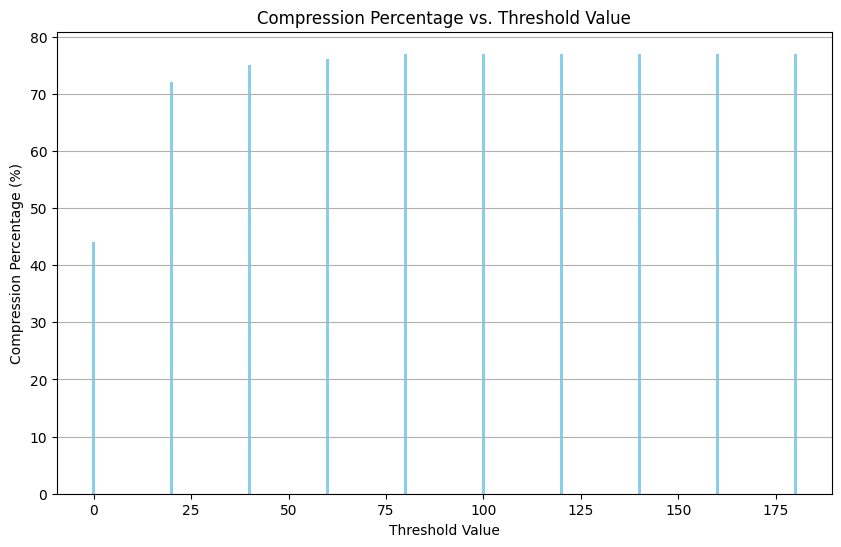

The average time is 4.68 seconds


In [ ]:
import sys
import os
import time
import numpy as np
import pywt
import matplotlib.pyplot as plt
from PIL import Image

# Function for 2D wavelet transform
def wavelet_transform(data, threshold):
    wavelet_type = 'haar'
    clean_coef = []

    # 2D Wavelet decomposition
    cA2, cD2, cD1 = pywt.wavedec2(data, wavelet_type, level=2)
    clean_coef.append(cA2)
    clean_coef.append(cD2)

    # Thresholding and cleaning
    compose = [np.where(((c < (-threshold)) | (c > threshold)), c, 0) for c in cD1]
    clean_coef.append(tuple(compose))

    # 2D Wavelet reconstruction
    t = pywt.waverec2(clean_coef, wavelet_type)
    values = t.astype(int)
    return values

# Function to create a new image from transformed values
def create_image(image, values, threshold):
    matrix = [
        [
            (int(v), int(v), int(v)) for v in value
        ] for value in values
    ]

    width, height = image.size
    new_image = Image.new('RGB', (width, height))
    new = new_image.load()

    # Transpose the matrix while creating the new image
    for w in range(width):
        for h in range(height):
            new[w, h] = matrix[h][w]

    image_name = f"{threshold}.png"
    new_image.save(image_name)
    return new_image

# Function to convert image to grayscale
def grayscale(image):
    width, height = image.size
    pixels = image.load()

    for w in range(width):
        for h in range(height):
            r, g, b = pixels[w, h]
            gray = (r + g + b) // 3
            pixels[w, h] = (gray, gray, gray)

    return image

# Function to get pixel values from each row of the image
def get_rows_values(image):
    width, height = image.size
    pixels = image.load()
    matrix = [[pixels[i, j][0] for i in range(width)] for j in range(height)]

    array = np.array(matrix)
    return array

# Function to compress the image using wavelet transform and save the result
def compress(image_path, threshold):
    image = Image.open(image_path).convert('RGB')
    image = grayscale(image)

    data = get_rows_values(image)
    values = wavelet_transform(data, threshold)

    new_image = create_image(image, values, threshold)
    return compressed_percentage(image_path, threshold)

# Function to calculate the compression percentage
def compressed_percentage(image_path, threshold):
    original_size = os.path.getsize(image_path)
    image_name = f"{threshold}.png"
    final_size = os.path.getsize(image_name)
    percentage = 100 - (final_size * 100) // float(original_size)
    print(f"Image compressed at {percentage:.2f}%")
    return percentage

# Main function to execute the compression process and plot the results
def main():
    # Specify the path to the image
    image_path = "/content/drive/My Drive/encoded.png"

    time_list = []
    percentages_list = []
    thresholds_list = list(range(0, 200, 20))

    # Iterate over different threshold values
    for threshold in thresholds_list:
        # Measure the time taken for compression
        start_time = time.time()
        compressed_percentage_value = compress(image_path, threshold)
        end_time = time.time()
        process_time = end_time - start_time

        time_list.append(process_time)
        percentages_list.append(compressed_percentage_value)

    # Plot the results as a bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(thresholds_list, percentages_list, color='skyblue')
    plt.title('Compression Percentage vs. Threshold Value')
    plt.xlabel('Threshold Value')
    plt.ylabel('Compression Percentage (%)')
    plt.grid(axis='y')
    plt.show()

    # Calculate and print the average time
    average_time = sum(time_list) / len(time_list)
    print(f'The average time is {average_time:.2f} seconds')

if __name__ == '__main__':
    main()


In [ ]:
import cv2
import numpy as np
from math import log10, sqrt

# Function to calculate Peak Signal-to-Noise Ratio (PSNR)
def PSNR(original, steg):
    # Resize the original image to match the dimensions of the stego image
    original = cv2.resize(original, (steg.shape[1], steg.shape[0]))

    # Calculate Mean Squared Error (MSE)
    mse = np.mean((original - steg) ** 2)

    # Check if MSE is zero to avoid division by zero
    if mse == 0:
        return 100

    # Maximum pixel value
    max_pixel = 255.0

    # Calculate PSNR using the formula
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

# Read the original and stego images
original = cv2.imread("/content/drive/My Drive/peakpx.jpg")
steg = cv2.imread("/content/drive/My Drive/encoded.png")

# Calculate PSNR value
value = PSNR(original, steg)

# Print the PSNR value
print(f"PSNR value: {value} dB")

PSNR value: 81.09222348588554 dB


In [ ]:
from hashlib import sha256
import base64
from Crypto import Random
from Crypto.Cipher import AES
import pandas as pd
from cryptography.hazmat.primitives.serialization import load_pem_private_key
from cryptography.hazmat.primitives.serialization import load_pem_public_key
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.exceptions import InvalidSignature
from cryptography.hazmat.primitives import serialization, hashes
from cryptography.hazmat.primitives.asymmetric import padding
from PIL import Image
import stepic

In [ ]:
im = Image.open('/content/drive/My Drive/encoded.png')

# Decode the stego image using the stepic library
stego_image = stepic.decode(im)

# Find the index where the 'SIGNATURE' separator is located
ind_sep = stego_image.find('SIGNATURE')

# Extract the message and signature from the stego image
message = bytes(stego_image[:ind_sep], 'utf-8')
signature = bytes(stego_image[ind_sep + 9:], 'latin1')

In [ ]:
def load_public_key(filename):
    # Load the public key from a PEM file
    with open(filename, 'rb') as pem_in:
        pemlines = pem_in.read()
    public_key = load_pem_public_key(pemlines, default_backend())
    return public_key

# Load the public key from the PEM file
public_key = load_public_key("public_key.pem")

# Verify the signature using the loaded public key
try:
    public_key.verify(
        signature,
        message,
        padding.PSS(
            mgf=padding.MGF1(hashes.SHA256()),
            salt_length=padding.PSS.MAX_LENGTH
        ),
        hashes.SHA256()
    )
    print(message)
except InvalidSignature:
    print('Invalid Signature!')

b'Bd9MTijp4ypItMaTtuXu9Fkj2A0yXeXo6eYi23lnOLAC1eGoDEZDZA7PSwBP+1UsroGSq66PbudRucnG2qJeJKHdBXBmLMf7jsnamM1qyTbXS95i0pArJe2JQpSoHCG85rrankkF8ffANsDgS8aIyiRyDHixTJVvtsjlR/wI0cKf4s+44qL1jk+QT69ZPFjwPZF5frzfpoc5WcEp86R2A2ZPZPhnsbPVvE5SxpmfxZz9mC3h8U0MenUKzCAoWPKqodajQFasN/ZGSZuNyGO5MHZBi+YlAMagoSWKTSfalmcCHWmikho59he/Wt9f9eGrgAp5ESH3S5fUZxAdaA0DZKxNLi0ca1LPSEvHFLFqIUfvonzca0xNc5H8upXm+rS+oTZ/W2wtD2oNvjdu0SVs19MJLAq+CjFnvc+ho2HICODlP7DnXEhv4NddJXzMu0lYxdNlChJfKxCDa0TGSSVuvzG9y9/L4Nxt1/qK4o6RQmWd/KITlcV1Beg4b3VrJ9WCm5jHl1HEoLCjvFnhtu2wg/dXry/oPG4Y2Vl4Y8WWAZM='


In [ ]:
# Block size (in bytes)
BS = 16

# Padding function
pad = lambda s: bytes(s + (BS - len(s) % BS) * chr(BS - len(s) % BS), 'utf-8')

# Unpadding function
unpad = lambda s: s[0:-ord(s[-1:])]

class AESCipher:

    def __init__(self, key):
        # Initialize the AES cipher with the provided key
        self.key = bytes(key, 'utf-8')

    def decrypt(self, enc):
        # Decode the Base64-encoded input
        enc = base64.b64decode(enc)

        # Extract the initialization vector (iv) from the encrypted data
        iv = enc[:16]

        # Create an AES cipher object in CBC mode with the key and iv
        cipher = AES.new(self.key, AES.MODE_CBC, iv)

        # Decrypt the rest of the encrypted data and unpad it
        decrypted_data = unpad(cipher.decrypt(enc[16:]))

        # Decode the decrypted data from bytes to utf-8
        return decrypted_data.decode('utf8')

# Initialize the AESCipher with a key
cipher = AESCipher('LKHlhb899Y09olUi')

# Decrypt the message using the AES cipher
AES_decrypted = cipher.decrypt(message)

# Print the decrypted message
print(AES_decrypted)

TCTCGATCCGGCACCGCTACCTTGCGACCTATGTTGACCACGTCCATGTTCCGCTCGACCTTTGGCTCTTTGGGCTCAACCGCTACCTCCCGATGCGGCTCGACCCCAATGTCATTCCGCTTGCGATTCGGCACCGCTACCAGGGATGCAGATTAGGCGACAATATCGACCACGACGTCTACCGCTACCGAGACAAGGAGATAGATAGCATTAGCGAGGACATCGACCTCCGGCTTGATGGTTCGATGCACCCGCATGACGTTCGGATCAAAAACCGCTACCCGCAAAGTGGGCTCATTCGGCTCTACGATGGGATCTTCGACCTTGATGCGATTTTCTGGAACGATGACGACCGCTACCTCCATGTTTTCACGAATGTCTGGC


In [ ]:
# DNA code mapping
DNA_data = {
    "words": ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W",
              "X", "Y", "Z", " ", ",", ".", ":", "0", "1", "2", "3", "4", "5", "6", "7", "8", "9"],
    "DNA_code": ["CGA", "CCA", "GTT", "TTG", "GGC", "GGT", "TTT", "CGC", "ATG", "AGT", "AAG", "TGC", "TCC", "TCT", "GGA", "GTG",
                 "AAC", "TCA", "ACG", "TTC", "CTG", "CCT", "CCG", "CTA", "AAA", "CTT", "ACC", "TCG", "GAT", "GCT", "ACT", "TAG",
                 "ATA", "GCA", "GAG", "AGA", "TTA", "ACA", "AGG", "GCG"]
}

# Create a DataFrame from the DNA data
DNA_df = pd.DataFrame.from_dict(DNA_data)

# Break the decrypted message into triplets
triplets = [AES_decrypted[i:i + 3] for i in range(0, len(AES_decrypted), 3)]

# Convert triplets back to the original message
original_message = ""
for triplet in triplets:
    original_message += str(DNA_df.loc[DNA_df['DNA_code'] == triplet, 'words'].iloc[0])

# Print the original message in lowercase
print("PATIENT DATA:", original_message.lower())
import tensorflow.keras.models as models
import numpy as np
game_board = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
# Replace 'your_model_path.h5' with the actual path to your .h5 model file
model_path = 'policies/models/20231218_054446.h5'

# Load the model
model = models.load_model(model_path)
input_array = np.expand_dims(game_board, axis=-1)  # Add batch dimension if needed
#input_array = np.transpose(input_array, (0, 2, 3, 1))
y_pred = model.predict(input_array).squeeze()
#y_pred.sort()
y_pred = y_pred[2].reshape((15, 15))

y, x = np.unravel_index(np.argmax(y_pred), y_pred.shape)
print(y_pred)
#return x, y


PATIENT DATA: name : david smith, gender : male, birthdate : 8.3.1972, ssn : 47851236987, medical history : hypertension, diagnosis : migraine
